# 1. Import

In [498]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model

%matplotlib inline

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# 2. Reading the data

In [499]:
Data = pd.read_csv(r"credit_risk_dataset.csv")
Data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3,Y
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,2,N
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,3,N
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,2,N
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,4,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,30,N
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,19,N
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,28,N
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,26,N


In [500]:
Data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [501]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  cb_person_default_on_file   32581 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# 2.1 Encoding Categorical Data

In [502]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#Scanning through all Columns
for column in Data.columns:
    
    #Finding Categorical Data columns
    if Data[column].dtype == 'object':
        Data[column] = encoder.fit_transform(Data[column])

#Alternate encoder function to change categorial data to dummy numerical data.

def encoder(df):
    
    #Scanning through all Columns
    for column in df.columns:
        
        #Finding Categorical Data columns
        if df[column].dtype == 'object':
             
                # Step 1: Find unique categories
                unique_categories = df[column].unique()

                # Step 2: Create a mapping
                category_mapping = {category: index + 1 for index, category in enumerate(unique_categories)}

                # Step 3: Use the map function to replace values
                df[column] = df[column].map(category_mapping)  
                

#encoding the categorial data using the user defined function "encoder" above.
encoder(Data)

# 3. EDA 

<Axes: >

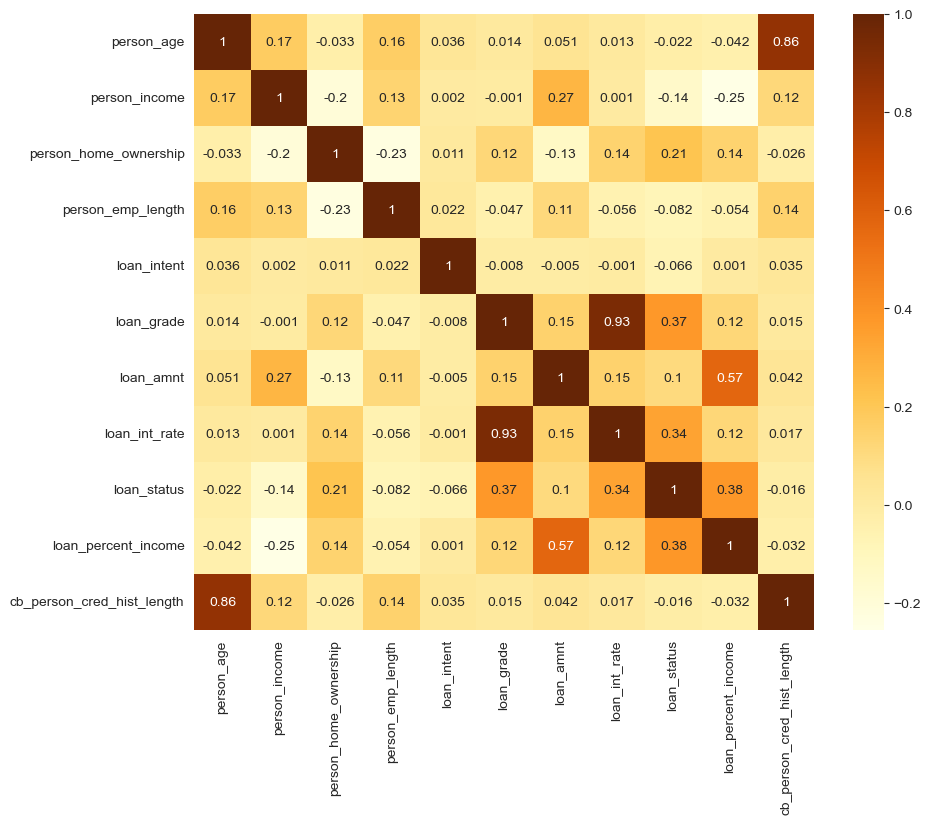

In [503]:
plt.figure(figsize=(10, 8))
correlation = Data.iloc[:,:-1].corr().round(3)
sns.heatmap(correlation,annot=True,cmap='YlOrBr')

In [504]:
# Define the independent variables (features) and the dependent variable (target)
X = Data[['person_age','cb_person_cred_hist_length']]

# Calculate VIF for each independent variable
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_data = calculate_vif(X)

# Display the VIF results
print(vif_data)

                     Variable       VIF
0                  person_age  5.749017
1  cb_person_cred_hist_length  5.749017


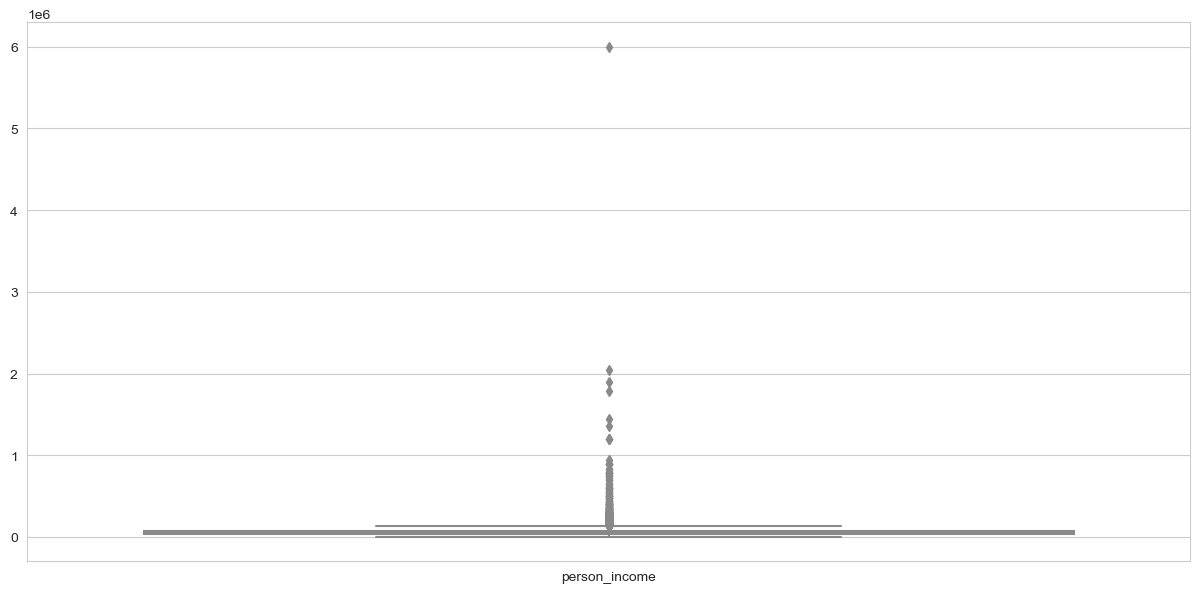

In [505]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['person_income']])
plt.show()

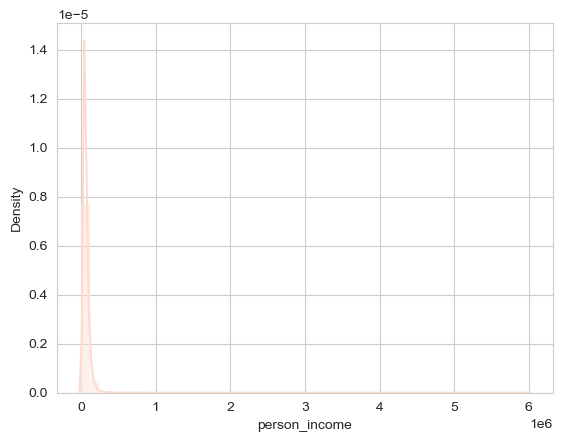

In [506]:
sns.set_palette("Reds")
sns.set_style('whitegrid')

# Residual check 

sns.distplot((Data['person_income']),bins=50);

In [507]:
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    a = 1.5 * IQR
    LOWER_LIMIT = Q1 - a
    UPPER_LIMIT = Q3 + a
    
    # Correcting UPPER_LIMIT to use Q3 instead of Q1
    df_final = df[~((df < LOWER_LIMIT) | (df > UPPER_LIMIT))]
    
    return df_final

In [508]:
#Calling the function to remove outliers
Data[['person_age']]=remove_outlier_IQR(Data[['person_age']])
Data.dropna(inplace=True)
Data[['person_income']]=remove_outlier_IQR(Data[['person_income']])
Data.dropna(inplace=True)
Data[['person_emp_length']]=remove_outlier_IQR(Data[['person_emp_length']])
Data.dropna(inplace=True)
Data[['loan_amnt']]=remove_outlier_IQR(Data[['loan_amnt']])
Data.dropna(inplace=True)
Data[['loan_int_rate']]=remove_outlier_IQR(Data[['loan_int_rate']])
Data.dropna(inplace=True)

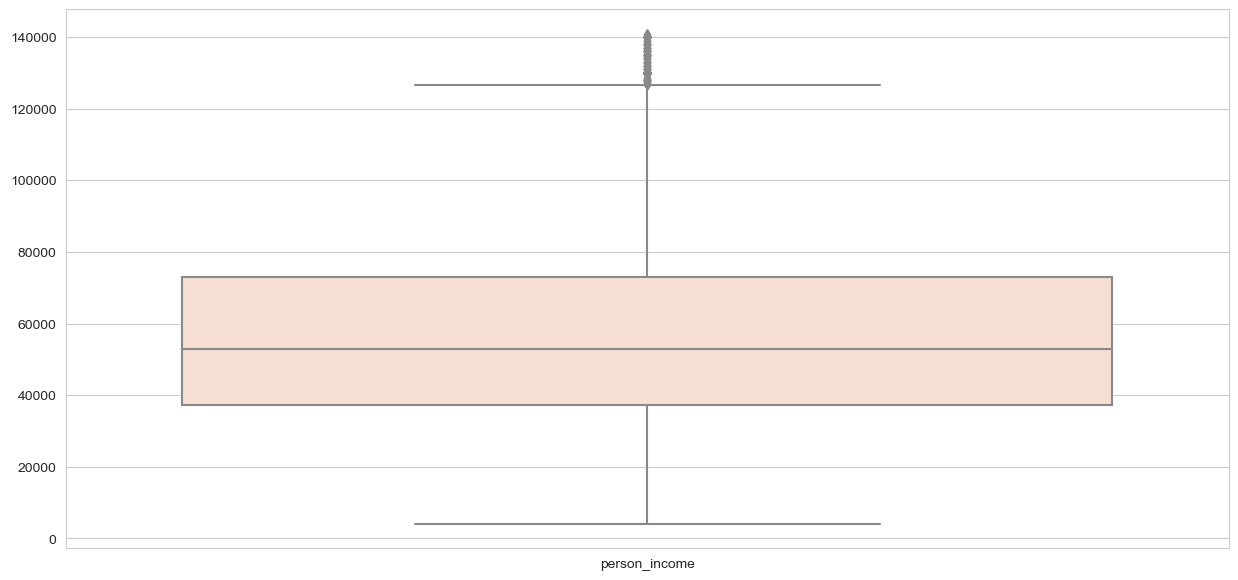

In [509]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['person_income']])
plt.show()

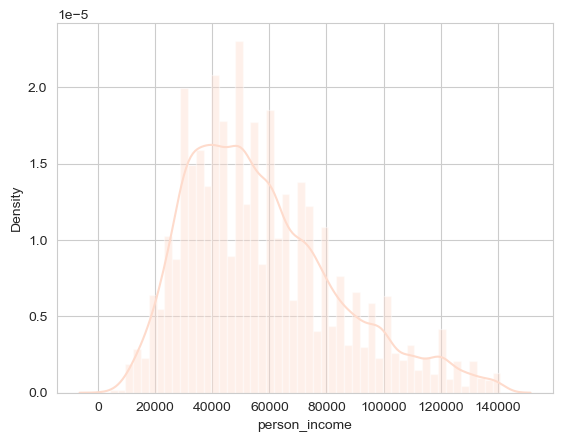

In [531]:
sns.set_palette("Reds")
sns.set_style('whitegrid')

# Residual check 

sns.distplot((Data['person_income']),bins=50);

In [532]:
(Data.isnull().sum()/len(Data))*100

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_cred_hist_length    0.0
cb_person_default_on_file     0.0
dtype: float64

In [533]:
# We have few null values as per previous output, lets drop them
Data.dropna(inplace = True)
Data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_cred_hist_length    0
cb_person_default_on_file     0
dtype: int64

In [513]:
X=Data.iloc[:,:-1]
Y=Data.iloc[:,-1]
X.shape

(24434, 11)

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

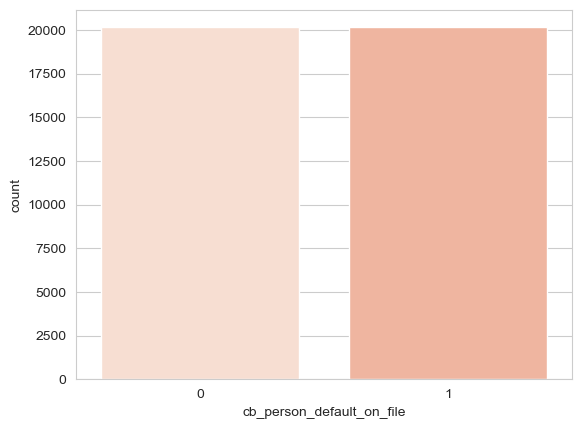

In [514]:
#Over sampler adds data points as per the data given to balance out target count
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X, Y)
sns.countplot(x=Y)

In [515]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=1)

In [516]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 20)

clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=20)

In [517]:
Y_pred = clf.predict(X_test)

In [518]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9106810569408262

In [519]:
param_dist = {"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,None]}

In [520]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=-1)

In [521]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=20), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, None]})

In [522]:
grid.best_score_

0.9359199896127878

In [523]:
grid.cv

10

In [524]:
grid.best_params_

{'criterion': 'gini', 'max_depth': None}

In [529]:
answers = np.zeros(60)
for i in range(1,60):
    
    clf = DecisionTreeClassifier(criterion='gini',max_depth = i)

    clf.fit(X_train,Y_train)

    Y_pred = clf.predict(X_test)

    answers[i] = accuracy_score(Y_test,Y_pred)
    
answers

array([0.        , 0.89368565, 0.89368565, 0.8938097 , 0.8938097 ,
       0.89393376, 0.89393376, 0.89393376, 0.89343754, 0.89442997,
       0.89455403, 0.89554646, 0.89529835, 0.89715916, 0.89827565,
       0.8997643 , 0.90249349, 0.90249349, 0.90423024, 0.9089443 ,
       0.91030889, 0.91291403, 0.91626349, 0.92072944, 0.9224662 ,
       0.92469917, 0.92829674, 0.93052971, 0.93313485, 0.93524377,
       0.93710458, 0.93710458, 0.93698052, 0.93908944, 0.93809701,
       0.93846917, 0.93884133, 0.9392135 , 0.94008188, 0.93908944,
       0.93859323, 0.93896539, 0.93834512, 0.93859323, 0.93797296,
       0.93896539, 0.93958566, 0.94045404, 0.93834512, 0.93970971,
       0.94008188, 0.93970971, 0.93983377, 0.93884133, 0.93772485,
       0.93896539, 0.9378489 , 0.93908944, 0.93871728, 0.93884133])

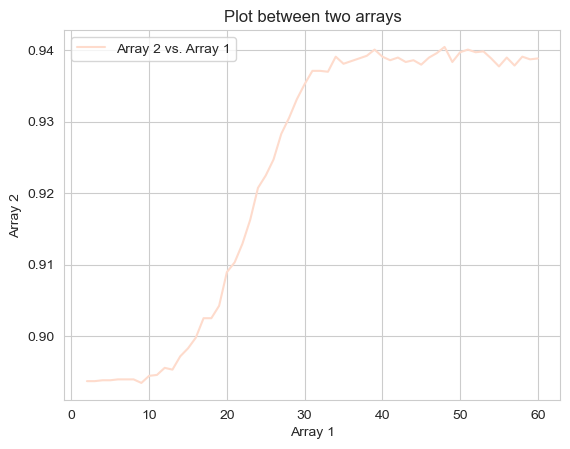

In [530]:
array1 = range(2,61)
array2 = answers[1:]
# Create a plot
plt.plot(array1, array2, label='Array 2 vs. Array 1')

# Add labels and title
plt.xlabel('Array 1')
plt.ylabel('Array 2')
plt.title('Plot between two arrays')

# Show a legend
plt.legend()

# Display the plot
plt.show()

In [528]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train,Y_train)

# Make predictions on the test data
Y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      4042
           1       0.85      1.00      0.92      4019

    accuracy                           0.91      8061
   macro avg       0.92      0.91      0.91      8061
weighted avg       0.92      0.91      0.91      8061

